---
title: Java Exploits and Cybersecurity
layout: post
type: tangibles
week: 17
description: Lesson on Java exploits and cybersecurity.
toc: True
comments: True
categories: notebook
---

## HTTP vs HTTPS Sites
> These are the two types of sites, HTTP being insecure and HTTPS being secure.

There are two types of sites, HTTP and HTTPS sites. One is obviously more secure than the other but why and how exactly is it more secure? The following sections will give an overview of this.

**Popcorn Hack:** Why is HTTPS more secure than HTTP?

### HTTP
In this case we are looking at posting passwords without encryption. Going to [vulnweb.com](http://testphp.vulnweb.com/login.php), a common test site for vulnerabilities, we can test and see how insecure data can be dangerous. Keep in mind that this is illegal to do on actual websites and networks.

We use a network scanner to track information between the internet and the client device. In this example we enter test data in to the username and password inputs:

![image](https://github.com/CSA-Tri-2/CSA-Tri-2/assets/111480448/2d6bd935-79fe-4178-a6b7-7d6292892b8a)

It looks like everything is secure to the user, the password is blocked from your general view and the website seems slightly trustworthy with it's formatting. This is, however, very far from the truth, especially when we begin using the network scanner to see the traffic.

![image](https://github.com/CSA-Tri-2/CSA-Tri-2/assets/111480448/0b71ae66-63fe-4864-aa50-d9ecd96723d6)

Here we see something that we are all familiar with, a POST. When we open the contents of this post, we can see the following:

![image](https://github.com/CSA-Tri-2/CSA-Tri-2/assets/111480448/b8e1ec9f-850f-4d6b-b6ab-a8af9528ac3d)

We can see the password in plain text that was inputted in the password field of the website. This is a very clear reason why you should never store your passwords without the use of encryption, like with TCP and TLS handshakes. 

### HTTPS
If I, for example, log into MyPlan, we can see an entirely different story:

![image](https://github.com/CSA-Tri-2/CSA-Tri-2/assets/111480448/7215c1d2-96dc-4e5e-b1b7-da0e47a4de29)

Here we see no POST, mainly because we are using something called TCP and TLS handshakes, which create an encrypted connection between the user and backend server.

## TCP and TLS
> Describing the encryption and communication protocols between servers for secure data.

This handshake process allows for a secure and encrypted method for sensitive data to be transferred between the client and server.

![](https://cf-assets.www.cloudflare.com/slt3lc6tev37/5aYOr5erfyNBq20X5djTco/3c859532c91f25d961b2884bf521c1eb/tls-ssl-handshake.png)

### TCP Three-Way Handshake
> The step process of connecting to the server securely.

A TCP handshake, more specifically a three-way handshake, is how the client and server initially establish a connection that is later used for communication. This method isn't secure by itself however it helps later establish a TLS connection which is more secure.

![tcp](https://github.com/CSA-Tri-2/CSA-Tri-2/assets/111480448/376fa2f2-b050-4445-8e36-238c0992ec6b)

#### Process

1. SYN (Synchronize) - initiates connection
    - sends ISN (initial sequence number) that is used as an identifier, organizing the data sent/received correctly
2. SYN-ACK (synchronize-acknowledge) - acknowledgement of connection
    - sends it's own ISN and the client's ISN, confirming a connection
3. ACK (acknowledge) - completing the connection
    - indicates that it knows the server's ISN

The server is now ready for a TLS connection.

### TLS Handshake
> This is where the encrypted data is transferred between the client and server. This exchange varies on the version of TLS that is used, however they all have a similar series of steps.\

This is how secure communication of secure information is sent between the client and server. This is how the more common TLS v1.2 typically works, however with the recent TLS v1.3, the basic steps remain the same.

![tls](https://github.com/CSA-Tri-2/CSA-Tri-2/assets/111480448/abc686bd-4350-4e45-8dfc-3916abe26412)

1. Client Hello - begins connection
    - send the TLS version that is supported, agreeing on a method of communication
    - provides the supported cipher suites, deciding on method of encryption
    - creates and sends string of random bytes used to create entropy in creating the pre-master secret
2. Server Hello - server response confirming connection
    - selects the highest supported TLS version, creating compatibility
    - selects a compatible cipher suite
    - creates another random string of bytes contributing to the creation of the pre-master secret
3. Authentication - SSL certificate
    - server sends the SSL certificate for client to read
4. Pre-Master Secret - shared secret between client and server
    - used to make session keys for safe transmission of data
    - this makes sure that only the server can access any data transmitted
5. Session keys - common set of keys
    - used to decrypt any information sent between client and server
6. Finished Message - finishes setting up encryption
    - the client and server can now send and receive encrypted data

The server and client can now exchange information with a smaller risk than without encryption.

**Note:** Encryption is not 100% safe. TLS 1.2 has been recently replaced with TLS 1.3, due to RSA being deemed insecure when compared to ECDHE (Elliptic Curve Diffie-Hellman). This is because RSA is relatively shorter in length and with the advance of quantum computing is easier to decrypt. You can learn more about this [here](https://www.cloudflare.com/learning/ssl/keyless-ssl/).

**Popcorn Hack:** In your own words describe how the TCP and TLS handshakes work to create a reliable and secure connection between the client and server.

## Other Common Exploits
> These are some exploits that may be used through the browser to not only steal information through packet sniffing but also download malicious content that can gather sensitive data.

### Phishing
> This is another way that hackers can more directly steal information.

Moving away network interception exploits, this is another common tool that is extremely easy to replicate with the right knowledge. Websites that mask themselves as other websites usually catch people that don't pay much attention to what they click. It is extremely easy to create such sites that are port-forwarded through local nginx servers, capturing data that unsuspecting visitors may enter. These sites usually use simple POST actions to transmit the data to the server, making these sites not only dangerous to access because they steal information but also dangerous because they are easy to intercept as previously mentioned. Here are a few examples of what they might look like:

![image](https://github.com/CSA-Tri-2/CSA-Tri-2/assets/111480448/3fb5213e-0662-4647-a8c5-5a29aba47840)

![image](https://github.com/CSA-Tri-2/CSA-Tri-2/assets/111480448/07b3acbb-b9a6-4874-bdf8-5a0fce672087)

### Computer Exploits
> Hackers can also steal information through malware that is installed onto a user's computer.

Information doesn't always have to be stolen through the transmission of data to servers. It can also be stolen with local software. Some common methods are:

- Viruses
    - attach themselves to programs and replicate as that host program runs
- Worms
    - self-replicating programs that spread across networks
- Trojans
    - malware disguising itself as another software within other system
- Spyware
    - tracking data about the user like keystrokes, online activities, and sensitive information
- Ransomware
    - encrypts user data and demands ransom for decryption key
- Rootkits
    - modify system files to hide malware

All of these are types of malicious software that can be used to steal the information of people. Such software is usually installed due to a lack of precautions from the user of a device, resulting from clicking on links that contain malware. This can be very easily prevented by using the following:

- Using a strong password that would be hard to guess.
    - Use 2FA when you are able to.
- Be careful which websites you visit.
    - Don't click on random links.
    - Be careful of emails.
- Having an updated system with the latest security features.
    - Using the latest antivirus program to secure your device.
    - Make sure all encryption you are using isn't outdated.
- Use secure Wi-Fi networks.
    - Use the latest security encryption on your Wi-Fi networks.
    - Use trustworthy VPNs when on public networks.

**Popcorn Hack:** Research three specific example of such attacks that have occurred throughout history.

## What is a SQL Inject

Often times, web services provide users the choice to input data, which is then sent to the backend of the service. This data could then be processed and be stored in a database table for future use. A SQL Inject takes advantage of this relationship. Since every database interaction can be represented with an SQL query, if our input data happened to be a SQL fragment that completed the query to perform unexpected tasks, then isn't it possible for us to gain unauthorized access to the database? 

These are some of the notable SQL Inject breaches in the past years:
 - GhostShell attack (Targetted university records)
 - Turkish government (Breached government website to wipe national debt)
 - 7-Eleven breach (Stole credit card information from corporate systems)

### Popcorn Hack:  
Name three more ways of how an SQL Inject could be used for malicious actions, and what are the consequences of each action?  
Change info to make yourself an admin. Take credit card info and stuff from bank backend if bank is bad. gain access to backend files that you're not supposed to see.

## What does an SQL Inject look like?
Pretend our school had a website has a simple function that returns a users information when they input their unique id and password (that only they know about). To retrieve this information, our backend has the following SQL query:

```sql
SELECT * FROM users_info WHERE uuid = 1920450 AND password="5994471abb01112afcc18159f6cc74b4f511b9980";
```

On the frontend, we may expect an html table that lists the information of the user who corresponds to the id that we inputted. Maybe something that looks like this

<table>
    <tr>
        <th>ID</th>
        <th>Student</th>
        <th>GPA</th>
        <th>Rank</th>
    </tr>
    <tr>
        <td>1920450</td>
        <td>Alexander Lu</td>
        <td>3.85</td>
        <td>79</td>
    </tr>
</table>  

If we were normal students, we should think this is enough security. Unique user IDs, hashed passwords, everthing is chill right?   

***WRONG!!!!***

### Performing the Inject
Now, knowing the name of the table, we could do a lot more with this feature. Even if I wasn't a student who knew his ID for a look up, I could still perform an SQL inject on this service. What if instead of an ID, I entered the following string as my query?

```sql
1927347 OR 1=1; --
```

This might not make sense the first time you see it, but lets place this into our last SQL query to see how it looks now.  

```sql
SELECT * FROM users_info WHERE uuid = 1927347 OR 1=1; -- AND password="5994471abb01112afcc18159f6cc74b4f511b9980";
```  

Let's break down each part of the string:
 - `1927347`: A random uuid that we supplied, THIS DOESN'T EVEN HAVE TO EXIST. You'll see why.
 - `OR`: A boolean condition in SQL, essentially makes it so that only one of the conditions must be met for the command (`SELECT * FROM users_info`) to execute properly.
   - Now do you see where we are going with this?
 - `1=1`: A simple arithmetic statement that is ***ALWAYS TRUE***
   - Even if our id isn't correct because the fact 1=1 is true for *every record of the table*, our database now thinks we want to return **every single row**.
 - `; --`: The semicolon finishes up our sql query, and the -- comments out the rest of the SQL query, maintaining the integrity of our statement and allowing the injected query to run properly.  

Our frontend now might look something like this:
<table>
    <tr>
        <th>ID</th>
        <th>Student</th>
        <th>GPA</th>
        <th>Rank</th>
    </tr>
    <tr>
        <td>1923498</td>
        <td>Alexander Lu</td>
        <td>3.85</td>
        <td>79</td>
    </tr>
    <tr>
        <td>1910483</td>
        <td>David Vasilev</td>
        <td>3.85</td>
        <td>77</td>
    </tr>
    <tr>
        <td>1899283</td>
        <td>Ethan Zhao</td>
        <td>4.00</td>
        <td>22</td>
    </tr>
    <tr>
        <td>...</td>
        <td>...</td>
        <td>...</td>
        <td>...</td>
    </tr>
</table>  

### Popcorn hack:  
Explain briefly, what a SQL inject is, in your own words, and how it functions:  
editing backend by inputing our own sql code to gain backend information.

## Methods of SQL Injects
There are many different ways of performing an SQL inject. Ultimately, it hinges on your knowledge of SQL syntax to game whatever query that your target has set up. Here are just some of the few strategies I've learned over the years, but you can gain addiitonal practice from doing CTF challenges.

### Using keyword OR
Essentially, this was the strategy that you saw above. The intuition behind this strategy is offering an alternate condition for a Given SQL statement to succeed, to bypass any authentication checks. Keep in mind that there might be additional query after the ineject, so we would require SQL comments like `--` to ensure our inject works properly.

### Using Union 
The `UNION` keyword in SQL is often used to join two SQL statements together, more specifically, the `SELECT` statement. What this allows us to do is to get the results of two seperate SELECT statements, and can be used to give us additional info on the database's structure by writing a new command. Take the SQL statement from above:  

```sql
SELECT * FROM users_info WHERE uuid = ... AND password='...';
```  

The statement created by the server only looks for info in the `users_info` table. But with union, we can add an additional query to the end of this. For this example, I'll be performing an inject on the uuid field. The inject will look something like this:

```sql
123' UNION SELECT name, sql from sqlite_master;--
```

Now the actual query looks like this:

```sql
SELECT * FROM users_info WHERE uuid ='123' UNION SELECT name, sql from sqlite_master;-- ... AND password=';
```  

Even if the first select statement doesn't return anything, our union statement will select the name and schema of the database in the backend. However, this command only works for an sqlite server, as we know the name of the table to be sqlite_master, and probably won't work for any services hosted through MySQL, MariaDB, Postgresql or etc.

### An Example I saw last week
<img src="https://ylu-1258.github.io/YLU_blog/assets/img/Exploits_imgs/image.png">

### Protecting Against SQL injects
Obviously, if every company's database and services were fragile enough to be attacked with SQLinjects, the world would be in flames. There are many ways and methods to protect against these attacks.

#### Placing Limits on User Inputs
A common, and simple strategy to use is to place restrictions on what the user can input. Much of our SQLinjects rely on adding additional SQL statements and code to execute what we wish for it to do. Some of the following tactics could work to protect against SQL Injects:
 - Reducing the maximum input length
 - Restricting the use of special characters used for query (; - ' etc.) 
 - Validating user input (try not to use textboxes if you can, utilize selection boxes, dropdown menus, etc.)
 - Principle of least privilege
    - Do not give DELETE, INSERT, UPDATE permissions if not needed. Give the least authority on the databse that's required for the service to function.

### Parameterized Statements
Often in the backend, we may construct SQL Queries using string concatenation. ***DON'T DO THIS.*** While it is convinient, using parameterized statements are much more secure. considering the following two examples:

In [ ]:
import java.sql.*
// The user we want to find.
String email = "user@email.com";

// Connect to the database.
Connection conn = DriverManager.getConnection(URL, USER, PASS);
Statement stmt = conn.createStatement();

// Bad, bad news! Don't construct the query with string concatenation.
String sql = "SELECT * FROM users WHERE email = '" + email + "'";

// I have a bad feeling about this...
ResultSet results = stmt.executeQuery(sql);

while (results.next()) {
  // ...oh look, we got hacked.
}


In [ ]:
import java.sql.*
// Connect to the database.
Connection conn = DriverManager.getConnection(URL, USER, PASS);

// Construct the SQL statement we want to run, specifying the parameter.
String sql = "SELECT * FROM users WHERE email = ?";

// Generate a prepared statement with the placeholder parameter.
PreparedStatement stmt = conn.prepareStatement(sql);

// Bind email value into the statement at parameter index 1.
stmt.setString(1, email);

// Run the query...
ResultSet results = stmt.executeQuery(sql);

while (results.next())
{
    // ...do something with the data returned.
}

In the first example, we used regular string concatenation to construct our query. When we send our final query statement to the database manager, it just executes the query simply as it is, even if a malicious party injected harmful code into it. This is ***BAD***  

In the second example, we used parameterized statements and then proceeded to update our query statement with the desired value. This allows the databse driver to interpret the SQL statement before executing, which gives us the ability to prevent injected harmful code from running. The data is treated as data, not as SQL queries. This is ***GOOD***.  

From my knowledge, I believe our current spring inmplementation uses Object Relational Mapping to make Database entries act as Java objects. These implementations typically already use aprameterized statements, which serves to add a layer of security to our applications. However, ORM applications still allow you to concatenate strings for more complex SQL queries, which could still result in a vulnerability.  

There are alot more ways of securing against SQL attacks, like client-side validation, but you can research that on your own, **if you write a blog on it, it could be a good reason to add points to your hacks**.

## What is XSS?
XSS (Cross Site Scripting) is a security vunerability.

**OCCURS WHEN** an attacker injects malicious scripts into web pages that are viewed by other users.

The scripts can be executed in the context of a user's browser, leading to potential harm:
1. Stealing sensitive information
2. Session hijacking
3. Defacing websites

A term needed to know to understand XSS is **payload**: A "payload" refers to the malicious code or set of instructions that an perpetrator (attacker) delivers to a target system to achieve a specific objective, ex. stealing information from others.

**Popcorn hack:**
What are two other possible harms of XSS?

## 3 Main Types of XSS:

### **Stored XSS:**
**General Definition**: Occurs when the malicious script is permanently stored on the target server and served to users whenever they access the compromised page.

![image](https://www.imperva.com/learn/wp-content/uploads/sites/13/2019/01/sorted-XSS.png)

**Steps based on the diagram:**
1. *Perpetrator Discovers Vulnerability:*
    - Description: The attacker, known as the perpetrator, identifies a website that has a security vulnerability, often related to inadequate input validation or output encoding.
    - Objective: The goal is to find a weakness that allows the injection of malicious scripts into the web application.
2. *Injection of Malicious Script:*
    - Description: The perpetrator injects a malicious script into the vulnerable website. This script is designed to execute specific actions when loaded by visitors' browsers.
    - Objective: The injected script is crafted to steal sensitive information, commonly session cookies, from users who visit the compromised page.
3. *Activation of Malicious Script:*
    - Description: Whenever a visitor accesses the perpetrated website, the injected malicious script is activated within their browser.
    - Objective: The script executes in the context of the user's session, enabling the attacker to carry out actions on behalf of the user or extract sensitive information.
4. *Sending Stolen Session Cookies:*
    - Description: The malicious script, now activated during each visitor's session, collects the session cookies of the users.
    - Objective: The stolen session cookies are sent back to the perpetrator, who can then use these cookies to impersonate the users, gaining unauthorized access to their accounts.

**Example:** An attacker discovers that a website allows user-generated content without proper input validation. They inject a script into a comment section, and whenever other users view that comment, the malicious script executes in their browsers, stealing their session cookies. The attacker then uses these stolen session cookies to log in as the compromised users.

### **Reflected XSS:**
**General Definition:** The injected script is part of the user's request and reflected back to the user, often via a crafted link. Unlike a Stored XSS, it doesn't exist on the target server, rather it exists in the malicious link.

![image](https://media.geeksforgeeks.org/wp-content/uploads/20210706191745/tuxpicom1625579254-660x373.jpg)

**Steps based on the diagram:**
1. *Perpetrator Sends Malicious Links:*
    - Description: The attacker, known as the perpetrator, sends crafted and malicious links to potential victims.
    - Objective: The links contain specially crafted payloads, often in the form of parameters in the URL, that exploit vulnerabilities on the targeted website.
2. *User Clicks the Link and Execution in the Browser:*
    - Description: A user receives the malicious link and clicks on it.
    - Objective: The payload embedded in the link is executed within the user's browser, exploiting the vulnerability on the target website.
3. *Browser Sends Private Data to the Attacker:*
    - Description: As a result of the executed payload, the user's browser performs actions on the targeted website, often unintentionally.
    - Objective: The payload may include code that steals sensitive information, such as session cookies or other private data, from the user's session.

**Example:** An attacker discovers a website with a search feature that reflects the user's input in the URL without proper validation. The attacker sends a crafted link to a user, and when the user clicks it, the payload in the URL is reflected back by the website. This payload includes a script that steals the user's session cookie and sends it to the attacker.

### **DOM-based XSS:**
**General Definition**: DOM-based Cross-Site Scripting (DOM-based XSS) is a type of Cross-Site Scripting attack where the vulnerability is located in the Document Object Model (DOM) of a web page. Unlike traditional XSS attacks, where the malicious payload is inserted into the HTML content, DOM-based XSS occurs in the client-side script itself. 

![img](https://www.researchgate.net/publication/348065719/figure/fig7/AS:974893847937024@1609444214143/DOM-based-XSS-Attack-Model.png)

**Steps based on diagram:**
1. *Attacker Crafts a Malicious URL:*
    - Description: The attacker creates a specially crafted URL containing a malicious payload, typically in the fragment part of the URL (e.g., after the # symbol).
    - Objective: The goal is to inject malicious JavaScript code into the victim's browser.
2. *User Opens the Link:*
    - Description: The attacker tricks the user into opening the malicious link, causing the victim's browser to make a request to the targeted website with the malicious payload.
    - Objective: The user's action initiates the process of loading the targeted website.
3. *Website Receives the Request:*
    - Description: The targeted website receives the user's request, including the malicious payload in the URL fragment.
    - Objective: Despite receiving the payload, the website does not directly include it in the response to the user.
4. *Legitimate Script Execution:*
    - Description: The website processes the request and sends a response to the user's browser. The response may include legitimate client-side scripts.
    - Objective: The user's browser executes the legitimate scripts included in the response, causing the page to render as intended.
5. *Execution of Malicious Script:*
    - Description: During the legitimate script execution, the browser processes the malicious payload included in the page, leading to the execution of the attacker's injected script.
    - Objective: The attacker's script is executed in the context of the user's session, allowing it to perform malicious actions, such as stealing sensitive information.
6. *Sensitive Information Sent to Attacker:*
    - Description: The executed malicious script carries out actions, such as stealing user-sensitive information (ex. session cookies), which is then sent to the attacker's server.
    - Objective: The attacker gains unauthorized access to the victim's information, potentially leading to further exploitation.


**Popcorn Hack:**
Provide an example of DOM-based XSS...

**Example:**

## CORS (Everyone's Favorite!), MVC and Nginx

### What is CORS and what does it actually do?

- CORS stands for Cross Origin Resource Sharing and it works to defend the the server side (APIs and the Backend)
- When you make a request on the client side (the frontend site), your sending a request to another site which has an API, CORS works to protect sensitive data and make sure that only authorized websites and the site with the server to have access to the data.


## Where can you find CORS and how can you modify it and add it to your site?

If you go to any backend server you git cloned from Mr.Mort's [spring_portfolio](https://github.com/nighthawkcoders/spring_portfolio/blob/master/src/main/java/com/nighthawk/spring_portfolio/SecurityConfig.java), if you go ahead and navigate to `SecurityConfig.java` under `/src/main/java/com/nighthawk/spring_portfolio/` and scroll down, you see the following the code:

In [ ]:
.cors(Customizer.withDefaults())
.headers(headers -> headers
    .addHeaderWriter(new StaticHeadersWriter("Access-Control-Allow-Credentials", "true"))
    .addHeaderWriter(new StaticHeadersWriter("Access-Control-Allow-ExposedHeaders", "*", "Authorization"))
    .addHeaderWriter(new StaticHeadersWriter("Access-Control-Allow-Headers", "Content-Type", "Authorization", "x-csrf-token"))
    .addHeaderWriter(new StaticHeadersWriter("Access-Control-Allow-MaxAge", "600"))
    .addHeaderWriter(new StaticHeadersWriter("Access-Control-Allow-Methods", "POST", "GET", "OPTIONS", "HEAD"))
    .addHeaderWriter(new StaticHeadersWriter("Access-Control-Allow-Origin", "http://link1", "http://link2", "http://link3", "http://link4"))

What this is showing is the different things that a request must include in order for a request from a site to go through

`.addHeaderWriter(new StaticHeadersWriter("Access-Control-Allow-Credentials", "true"))`:

- This header indicates whether the browser should include credentials (like cookies, HTTP authentication, and client-side SSL certificates) in the request
- This is typically used when the server needs to send and receive cookies on the requested domain.

`.addHeaderWriter(new StaticHeadersWriter("Access-Control-Allow-ExposedHeaders", "*", "Authorization"))`:

- This header, enables you to specify custom headers ("*") and grants the browser to expose headers like "Authorization" to the client.

`.addHeaderWriter(new StaticHeadersWriter("Access-Control-Allow-Headers", "Content-Type", "Authorization", "x-csrf-token"))`:

- This line is listing the headers that the client is allowed to use in the actual request

`.addHeaderWriter(new StaticHeadersWriter("Access-Control-Allow-MaxAge", "600"))`:

- This line specifies that the results of a preflight request can be cached for in this case, 600 seconds
- What this does in other words is before the actual request is received, a small request is typically sent and this request is saved for 600 seconds allowing for it so when similar calls are made, the result of the initial call is reused, this improves the performance and latency.

`.addHeaderWriter(new StaticHeadersWriter("Access-Control-Allow-Methods", "POST", "GET", "OPTIONS", "HEAD"))`:

- This line just lists the different HTTP methods that are allowed when making a request

`.addHeaderWriter(new StaticHeadersWriter("Access-Control-Allow-Origin", "http://link1", "http://link2", "http://link3", "http://link4"))`:

- This line simply specifies what links are allowed to make requests to the server

### Frontend Side of CORS
- Based on the headers you assigned in the backend, your frontend fetch request must match what you defined

![](https://raw.githubusercontent.com/JishnuS420/BlogCSA/main/images/FrontendCORS.png)

### Some key reminders:
- When working with an API on the backend, in the areas where you want to protect the data, don't forget to do `import org.springframework.web.bind.annotation.CrossOrigin;` and include `@CrossOrigin` before the actual code 

## MVC and Nginx

### MVC

- MVC stands for Model View Controller, and its purpose is to build user interfaces and web applications and divides the application into three interconnected components: Model, View, and Controller

Model:
- The model is responsible for managing data and the logic and rules for manipulating the data
- It is independent from the user interface and works with the View and Controller

View: 
- The view is the part that works and is responsible for receiving the user input and presenting the data to the user
- It receives updates from the Model and sends the user input to the Controller

Controller:
- The controller functions to update the Model and sends the updates to the View 
- It makes and handles the decisions that the user makes, updating the Model and View to adapt to it

A great example of the MVC system would be the PersonAPI on the [spring_portfolio](https://github.com/nighthawkcoders/spring_portfolio/tree/master/src/main/java/com/nighthawk/spring_portfolio/mvc/person), where the `Person.java` is the Model, `PersonDetailsService.java` is the View, and the `PersonAPIController.java` is the controller

### MVC functions:
- MVC serves in order to make the code separated into different roles and parts allowing for it to be easily maintained and easily reusable. It also provides great extendability and makes it really easy to test the code since each part is essentially independent from each other.

### Nginx

Nginx is a web server and reverse proxy server that has a wide variety of functions that enable for better performance, security, and connections between a client and the server. Some its most important features include:

1. Web Server 
 - Nginx is able to handle incoming HTTP and HTTP requests from the client side with high performance, and can enable for the the direct serving of static content to the client side
 - This enables for really efficient delivery of static resources to the web applications

2. Reverse Proxy 
 - Nginx is a reverse proxy server as well and what this means is it takes requests from the frontend and connects it with the backend server and takes the response from the server and sends it back to the frontend 
 - This serves to shield the backend from being exposed to the internet and also enables many frontend clients to communicate with the backend

3. Balancing Loads
 - Nginx also helps to distribute the incoming requests and traffic equally among the backend servers and as a result, prevents the backend from being overwhelmed
 - As a result, this significantly helps the performance and the maintenance of the backend server and enables for efficient communications 

4. SSL/TLS Termination:
 - Nginx also can decrypt and encrypt the incoming data, from the frontend, sending it to the backend server
 - This functions as a way to both ensure secure communications and also serves as a process to make the backend focus on running logic instead of attempting to understand the request

## DotEnv

### What is DotEnv?
- DotEnv is the use of a .env file in a project to manage sensitive information like API keys, database credentials, and other information. 
- The term "dotenv" is often associated with a specific library or tool that helps load these variables into the application's environment.
- Its purpose is to avoid putting sensitive information, such as access tokens, directly into the source code or version control and instead it is put in the .env file, which is specific to each environment.

### To make it work
1. Navigate to your project's root directory using the command line:
```cd /home/kaiden_d0/vscode/kaidencsablog```
2. Initialize a new package.json file for your project:
```npm init -y```
3. Now, you can install dotenv:
```npm install dotenv```

![image](https://github.com/CSA-Tri-2/JDK-miniproject/assets/69410126/1a7686be-d69a-4e71-b7f2-97f2b3aff77b)
![image](https://github.com/CSA-Tri-2/JDK-miniproject/assets/69410126/35c1781b-3e35-4a53-a003-922cf7931d81)
![image](https://github.com/CSA-Tri-2/JDK-miniproject/assets/69410126/fc4178e5-c651-473c-85e7-e3ee36fa3c92)

- Make sure to add the .env file to your .gitignore so the sensitive information is not exposed
![image](https://github.com/CSA-Tri-2/JDK-miniproject/assets/69410126/e6889427-7e62-4305-b708-a3f300dc6c5d)

### Popcorn Hack
Make your own .env file, and make the js file display your own secret information (put screenshots).

## Hacks

- Create a PicoCTF account: [Link](https://play.picoctf.org/practice?category=1&page=1) -> go to Practice -> go to Web Exploit -> Complete any 5 challenges and blog about them.
- Capture the TCP and TLS protocols of your own springboot server project and document the steps in a blog. (Hint: Use Wireshark to capture the data.)
- Show and explain how CORS has been used in your previous projects.

### Extra +0.1

- Find a modern example of SQL Injection, XXS, or another exploit, describe how it has been done, how it has been fixed, and how it could have been prevented.

# PicoCTF
I'm trying to complete the challenges and I have no idea what I'm doing. I tried using postman to see if it maybe gives me some information to work with but I really have no idea what's going on. I took a stab at the first two challenges but they were above me.

# capture tcp and tls
First i had to install wireshart. I started wireshark using the wifi option and gtried to capture some actions from my website. I gave it a few tries, and I tried to put on a filter for my ip address but I'm not so sure that worked. There were two lines with black backgrounds that appeared when I refreshed the website page. There were also some red ones but I'm not sure why they appeared.  
![Screenshot 2024-01-08 195014.png](<attachment:{{site.baseurl}}/images/Screenshot 2024-01-08 195014.png>)  
![Screenshot 2024-01-08 195808.png](<attachment:{{site.baseurl}}/images/Screenshot 2024-01-08 195808.png>)  
![Screenshot 2024-01-08 200123.png](<attachment:{{site.baseurl}}/images/Screenshot 2024-01-08 200123.png/>)  
I just went through the site and clicked buttons and stuff. Opening a new page would spawn a black line.

# cors
Here is the CORS from my most recent project. As you can see, the last line has been commented out. I assume this was so CORS wouldn't gatekeep us from our own website anymore while we were working. The only real interaction I've had with CORS was it blocking me from my own website. It would help if there were other people trying to get information from our backend, but I don't think anyone is.  
![Screenshot 2024-01-08 202411.png](<attachment:Screenshot 2024-01-08 202411.png>)  

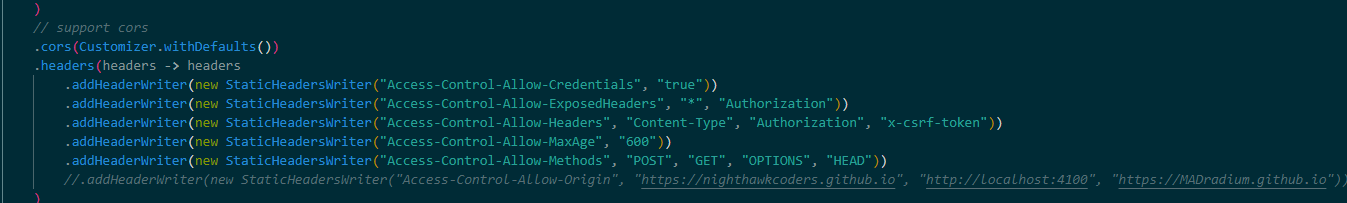